<a href="https://colab.research.google.com/github/yasheshgupta/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
dir_path="/content/drive/MyDrive/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv"

In [4]:
df= pd.read_csv(dir_path)

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
#i am duplicating the data
duplicate=df.copy()

In [8]:
df.shape

(1458644, 11)

**Let's Check the data distribution of cordinates**

In [9]:
dist_col=['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


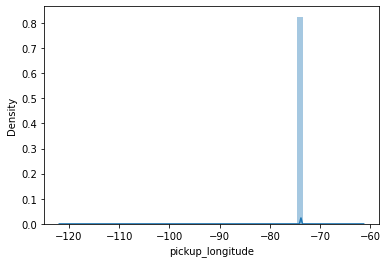

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


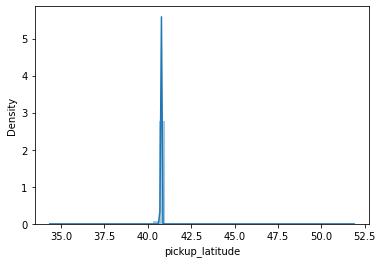

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


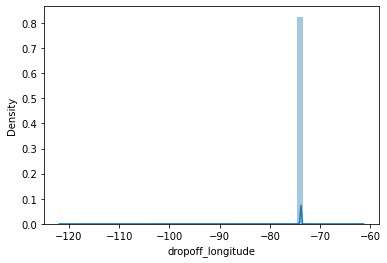

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


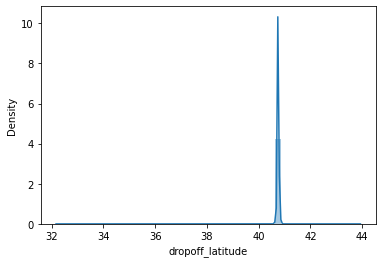

In [10]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [11]:
#Add bounds to coordinates from the dataset to avoid Outliers affecting the plots
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df= df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]

In [12]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


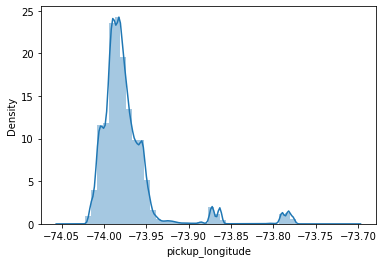

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


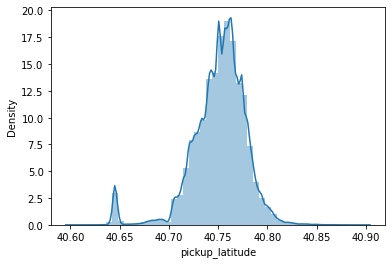

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


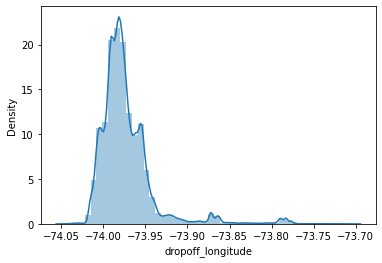

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


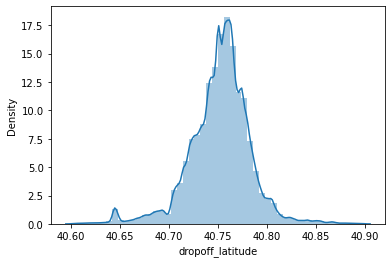

In [13]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [14]:
#i am removing more rows on the basis of this data distribution 
df= df.loc[(df.pickup_longitude > -74.02) & (df.pickup_longitude < -73.94)]
df = df.loc[(df.pickup_latitude > 40.7) & (df.pickup_latitude <40.81 )]
df = df.loc[(df.dropoff_longitude > -74.02) & (df.dropoff_longitude < -73.94)]
df = df.loc[(df.dropoff_latitude > 40.7) & (df.dropoff_latitude < 40.81)]


In [15]:
df.shape

(1217969, 11)

In [16]:
diff_colum2=1458644-1217969
diff_colum2

240675

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


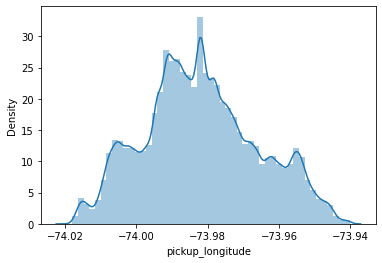

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


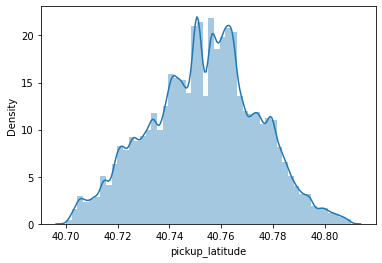

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


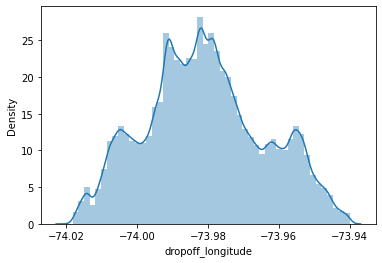

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


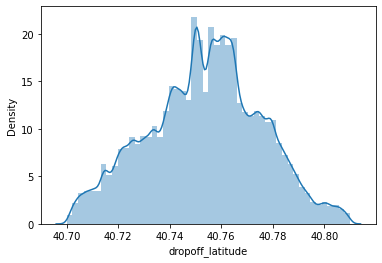

In [17]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

**Calculating the haversine distance**

In [18]:
def haversine_dist(sub_data):
  dlat=np.radians(sub_data['dropoff_latitude']-sub_data['pickup_latitude'])
  dlon=np.radians(sub_data['dropoff_longitude'] - sub_data['pickup_longitude'])
  r=6371 #in km
  h=np.sin(dlat/2)**2+np.cos(np.radians(sub_data['dropoff_latitude']))*np.cos(np.radians(sub_data['pickup_latitude']))*(np.sin(dlon/2))**2
  d=2*r*np.arcsin(np.sqrt(h))
  return d

In [19]:
df['haversine_dist']  = df.apply(haversine_dist, axis = 1)

In [20]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


**Here Velocity can major help us to perdict the trip duration let's calcuate it**

In [23]:
def velocity(df):
    return (df['haversine_dist']/(df['trip_duration']/360))

In [24]:
df['Velocity']  = df.apply(velocity, axis = 1)

In [26]:

df[df['Velocity']>3].shape

(23725, 13)

In [27]:
#lets know more about velocity and distances


In [28]:
df['Velocity'].describe()

count    1.217969e+06
mean     1.292527e+00
std      6.588433e-01
min      0.000000e+00
25%      8.605234e-01
50%      1.183615e+00
75%      1.600872e+00
max      9.267654e+01
Name: Velocity, dtype: float64

In [30]:
df['haversine_dist'].describe()

count    1.217969e+06
mean     2.271658e+00
std      1.595574e+00
min      0.000000e+00
25%      1.140896e+00
50%      1.825317e+00
75%      2.943582e+00
max      1.321932e+01
Name: haversine_dist, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


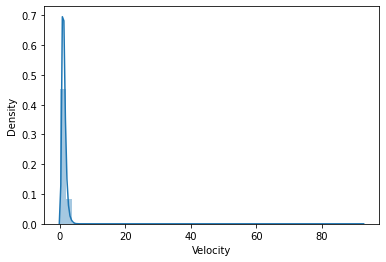

In [31]:
#checking distribution of velocity 
ax = sns.distplot(df['Velocity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


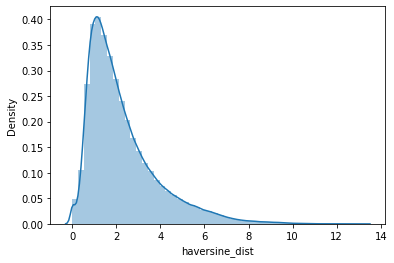

In [32]:
#checking distribution of distance
ax = sns.distplot(df['haversine_dist'])
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217969 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1217969 non-null  object 
 1   vendor_id           1217969 non-null  int64  
 2   pickup_datetime     1217969 non-null  object 
 3   dropoff_datetime    1217969 non-null  object 
 4   passenger_count     1217969 non-null  int64  
 5   pickup_longitude    1217969 non-null  float64
 6   pickup_latitude     1217969 non-null  float64
 7   dropoff_longitude   1217969 non-null  float64
 8   dropoff_latitude    1217969 non-null  float64
 9   store_and_fwd_flag  1217969 non-null  object 
 10  trip_duration       1217969 non-null  int64  
 11  haversine_dist      1217969 non-null  float64
 12  Velocity            1217969 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 130.1+ MB


In [34]:
#here Pickup_datetime and Dropoff_datetime should be in datatime formate

In [40]:
df.pickup_datetime = df.pickup_datetime.apply(pd.to_datetime) # converting object into datetime format
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217969 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1217969 non-null  object        
 1   vendor_id           1217969 non-null  int64         
 2   pickup_datetime     1217969 non-null  datetime64[ns]
 3   dropoff_datetime    1217969 non-null  object        
 4   passenger_count     1217969 non-null  int64         
 5   pickup_longitude    1217969 non-null  float64       
 6   pickup_latitude     1217969 non-null  float64       
 7   dropoff_longitude   1217969 non-null  float64       
 8   dropoff_latitude    1217969 non-null  float64       
 9   store_and_fwd_flag  1217969 non-null  object        
 10  trip_duration       1217969 non-null  int64         
 11  haversine_dist      1217969 non-null  float64       
 12  Velocity            1217969 non-null  float64       
dtypes: datetime6

In [41]:
#coverting into the datatime objects 
df=df.assign(pickup_date=df.pickup_datetime.dt.date, pickup_Time=df.pickup_datetime.dt.time)

In [42]:
#creating a copy of data 
duplicate1=df.copy()